In [ ]:
#This code generates a topology and input structure (*.Gro file) of preiodic 2D layer of NGS-1 chromophores grown on SiO2 (001) surface for classical MD simulations using GROMACS. Slabsize and occupancies can be modified in the input section.

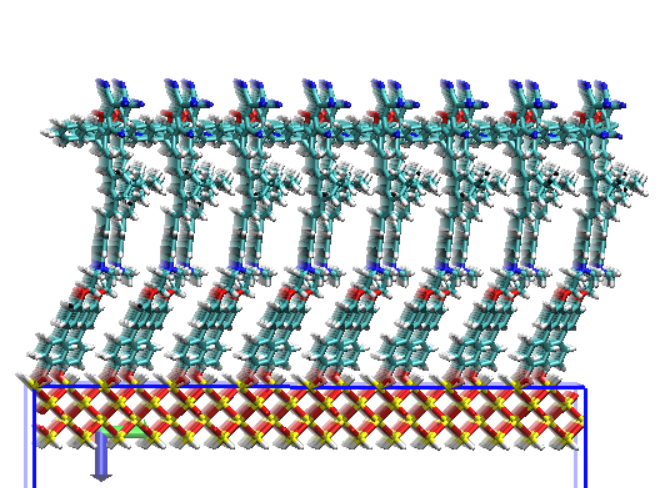

In [ ]:
import numpy as np
import pandas as pd
#Read gromacs topology files of the SiO2 unit cell to generate periodic slab structure.

#define diretories
typesdir = "[ atomtypes ]"
moleculetypes = "[ moleculetype ]"
atomsdir = "[ atoms ]"
bondsdir = "[ bonds ]"
anglesdir = "[ angles ]"
dihedralsdir = "[ dihedrals ]"
dihedralsdir_improper = "; IMPROPER DIHEDRAL ANGLES"
dihedralsdir_proper = "; PROPER DIHEDRAL ANGLES"
pairsdir = "[ pairs ]"

#Read input itp files
itpfile = 'SiO2repmod.itp'

slabsize = 8 #create nxn slab along x and y coordinate directions. Slab should extend first along x then along y

#atom linkages in the itp file
linkerSia = 23
linkerSib = 16

linkerOa1 = 7
linkerOa2 = 21
linkerOb1 = 6
linkerOb2 = 28

#corner x 1
linkerSic = 1
linkerOc1 = 14

bondparams = [1, 0.1640, 312963.200]
angleparams1 = [1, 110.000, 502.080]
angleparams2 = [1, 180.000, 167.360]
angleparamsH = [1, 109.500, 292.880]
angleparamsX = angleparamsH

In [54]:
#Open SiO2 unit cell ITP file

with open(itpfile, 'r') as itp1:
    lines = itp1.readlines() 

In [55]:
#atom types (non bonded interactions)
typesdirective1 = []
printgo = True
for line in lines:
    if atomsdir in line:
        printgo = False
    if printgo:
        typesdirective1.append(line.split())
typesdf1 = pd.DataFrame(typesdirective1[3:-3])

In [56]:
#atoms (bonded interactions)
atomsdirective1 = []
printgo = False
for line in lines:
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        atomsdirective1.append(line.split())

#Repeat atom coordinates for slab
atomsdirective_df1 = pd.DataFrame(atomsdirective1[2:-1])
stitchatomsdir1 = atomsdirective_df1.copy()
for i in range(np.square(slabsize)-1):
    atomsdirective_df1[0] = atomsdirective_df1[0].astype(int) + len(atomsdirective_df1)
    stitchatomsdir1 = pd.concat([stitchatomsdir1, atomsdirective_df1], ignore_index=True)
stitchatomsdir1

stitchatomsdir1.to_csv('2_Atoms_test.txt', sep='\t', index=False, header=False)

In [57]:
#bonds
bondsdirective1 = []
printgo = False
for line in lines:
    if bondsdir in line:
        printgo = True
    if anglesdir in line:
        printgo = False
    if printgo:
        bondsdirective1.append(line.split())
bondsdirectivedf1 = pd.DataFrame(bondsdirective1[1:-1])

In [58]:
#Repeat bond coordinates for slab
stitchbondsdir1 = bondsdirectivedf1.copy()
for i in range(np.square(slabsize)-1):
    bondsdirectivedf1.iloc[:,:2] = bondsdirectivedf1.iloc[:,:2].astype(int) + len(atomsdirective_df1)
    stitchbondsdir1 = pd.concat([stitchbondsdir1, bondsdirectivedf1], ignore_index=True)
stitchbondsdir1.to_csv('3_Bonds_test.txt', sep='\t', index=False, header=False)

In [59]:
#PERIODIC BONDS

#Si-O  connections along X direction
intrax = []
for i in range(0, slabsize**2):
    if i not in range(0, slabsize**2+1, slabsize):
        #print(i if i > 0 else '')
        Sia = [linkerSia + atomsdirective_df1.shape[0]*(i-1)]

        Oa1 = [linkerOa1 + atomsdirective_df1.shape[0]*(i)]
        Oa2 = [linkerOa2 + atomsdirective_df1.shape[0]*(i)]

        intrax.append(Sia + Oa1 + bondparams)
        intrax.append(Sia + Oa2 + bondparams)
intrax = pd.DataFrame(intrax) 
intrax
interx = []
for i in range(0, slabsize**2):
    if i in range(1, slabsize**2, (slabsize)):
        #print(i, i+(slabsize-1))
        Sia = [linkerSia + atomsdirective_df1.shape[0]*(i-1 + (slabsize-1))]

        Oa1 = [linkerOa1 + atomsdirective_df1.shape[0]*(i-1)]
        Oa2 = [linkerOa2 + atomsdirective_df1.shape[0]*(i-1)]  

        interx.append(Sia + Oa1 + bondparams)
        interx.append(Sia + Oa2 + bondparams)
interx = pd.DataFrame(interx) 
interx
periodicX_Si_O = pd.concat([intrax, interx], ignore_index=True)

In [60]:
#Si-O  connections along Y direction
intray = []
for i in range(1, slabsize**2+1):
    if i in range(1, (slabsize**2+1) - slabsize):
        #print(i, i+slabsize)
        Sib = [linkerSib + atomsdirective_df1.shape[0]*(i-1)]
        Ob1 = [linkerOb1 + atomsdirective_df1.shape[0]*(i+slabsize-1)]
        Ob2 = [linkerOb2 + atomsdirective_df1.shape[0]*(i+slabsize-1)]  
        intray.append(Sib + Ob1 + bondparams)
        intray.append(Sib + Ob2 + bondparams)
intray = pd.DataFrame(intray) 
intery = []
for i in range(0, slabsize**2):
    if i  in range(0, (slabsize+1)) and i > 0:
        #print(i, i+ (slabsize * (slabsize-1)))
        Sib = [linkerSib + atomsdirective_df1.shape[0]* (i+ (slabsize * (slabsize-1))-1)]
        Ob1 = [linkerOb1 + atomsdirective_df1.shape[0]*(i-1)]
        Ob2 = [linkerOb2 + atomsdirective_df1.shape[0]*(i-1)]  
        intery.append(Sib + Ob1 + bondparams)
        intery.append(Sib + Ob2 + bondparams)
intery = pd.DataFrame(intery) 

#Si -O connections wrap around corner to corner
wrap = []
for i in range(1, slabsize**2+1, slabsize**2):
    #print(i, i+slabsize**2-1)
    Sic = [linkerSic + atomsdirective_df1.shape[0]*(i-1)]
    Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*((i+slabsize**2)-2)]
    wrap.append(Sic + Oc1 + bondparams)
wrap = pd.DataFrame(wrap)

periodicY_Si_O = pd.concat([intray, intery], ignore_index=True)
periodic_Si_O = pd.concat([periodicX_Si_O, periodicY_Si_O, wrap], ignore_index=True)
#periodic_Si_O
#CHECKED - CORRECT!!!

In [61]:
# O-Si  connections along X direction
diagonalintrax = []
for i in range(0, slabsize**2): 
    if i in range(0, slabsize**2, slabsize) and i > 0:
        #print(i, i+1) in O Si order
        Sic = [linkerSic + atomsdirective_df1.shape[0]*(i)]
        Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*(i-1)]
        diagonalintrax.append(Sic + Oc1 + bondparams)
diagonalintrax = pd.DataFrame(diagonalintrax)

# O-Si  connections along Y direction
diagonalintray = []
for i in range(0, slabsize**2): 
    if i in range(slabsize**2 - slabsize, slabsize**2 - 1):
        #print(i + 1, i + 2 - (slabsize * (slabsize - 1)))
        Sic = [linkerSic + atomsdirective_df1.shape[0]*(i + 1 - (slabsize * (slabsize - 1)))]
        Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*(i)]
        diagonalintray.append(Sic + Oc1 + bondparams)
diagonalintray = pd.DataFrame(diagonalintray)
diagonalintray

# O-Si  connections along diagonal direction
diagonal = []
for i in range(0, slabsize**2 + 1):
    if i not in range(0, slabsize**2, slabsize) and i + slabsize + 1 <= slabsize**2:
        #print(i, i + slabsize + 1)
        Sic = [linkerSic + atomsdirective_df1.shape[0]*(i + slabsize)]
        Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*(i-1)]
        diagonal.append(Sic + Oc1 + bondparams)
diagonal = pd.DataFrame(diagonal)
diagonal      


periodic_O_Si = pd.concat([diagonalintrax, diagonalintray, diagonal], ignore_index=True)

#combine all bonds
bondstotal = pd.concat([stitchbondsdir1, periodic_Si_O, periodic_O_Si], ignore_index=True)

In [62]:
#angles
anglesdirective1 = []
printgo = False
for line in lines:
    if anglesdir in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        anglesdirective1.append(line.split())
anglesdirectivedf1 = pd.DataFrame(anglesdirective1[2:-1])
#anglesdirectivedf1
#Repeat angles coordinates for slab
stitchanglesdir1 = anglesdirectivedf1.copy()
for i in range(np.square(slabsize)-1):
    anglesdirectivedf1.iloc[:,:3] = anglesdirectivedf1.iloc[:,:3].astype(int) + len(atomsdirective_df1)
    stitchanglesdir1 = pd.concat([stitchanglesdir1, anglesdirectivedf1], ignore_index=True)
#stitchanglesdir1.to_csv('4_angles_test.txt', sep='\t', index=False, header=False)

In [63]:
#PERIODIC ANGLES

In [64]:
#O-Si-O  angles along X direction
intrax = []
pd.set_option('display.max_rows', None)
for i in range(0, slabsize**2):
    if i not in range(0, slabsize**2+1, slabsize):
        #print(i if i > 0 else '')
        Sia = [linkerSia + atomsdirective_df1.shape[0]*(i-1)]
        Oa1 = [linkerOa1 + atomsdirective_df1.shape[0]*(i)]
        Oa2 = [linkerOa2 + atomsdirective_df1.shape[0]*(i)]
        Ominus = [x - 1 for x in Sia]
        Oplus = [x + 1 for x in Sia]
        intrax.append(Ominus + Sia + Oa1 + angleparams1)
        intrax.append(Ominus + Sia + Oa2 + angleparams1)
        intrax.append(Oplus + Sia + Oa1 + angleparams1)
        intrax.append(Oplus + Sia + Oa2 + angleparams1)
        intrax.append(Oa1 + Sia + Oa2 + angleparams1)
intrax = pd.DataFrame(intrax) 

interx = []
for i in range(0, slabsize**2):
    if i in range(1, slabsize**2, (slabsize)):
        #print(i, i+(slabsize-1))
        Sia = [linkerSia + atomsdirective_df1.shape[0]*(i-1 + (slabsize-1))]
        Oa1 = [linkerOa1 + atomsdirective_df1.shape[0]*(i-1)]
        Oa2 = [linkerOa2 + atomsdirective_df1.shape[0]*(i-1)]  
        Ominus = [x - 1 for x in Sia]
        Oplus = [x + 1 for x in Sia]
        interx.append(Ominus + Sia + Oa1 + angleparams1)
        interx.append(Ominus + Sia + Oa2 + angleparams1)
        interx.append(Oplus + Sia + Oa1 + angleparams1)
        interx.append(Oplus + Sia + Oa2 + angleparams1)
        interx.append(Oa1 + Sia + Oa2 + angleparams1)
interx = pd.DataFrame(interx) 
periodicX_O_Si_O = pd.concat([intrax, interx], ignore_index=True)

In [65]:
#O-Si-O  angles along Y direction
intray = []
for i in range(1, slabsize**2+1):
    if i in range(1, (slabsize**2+1) - slabsize):
        #print(i, i+slabsize)
        Sib = [linkerSib + atomsdirective_df1.shape[0]*(i-1)]
        Ob1 = [linkerOb1 + atomsdirective_df1.shape[0]*(i+slabsize-1)]
        Ob2 = [linkerOb2 + atomsdirective_df1.shape[0]*(i+slabsize-1)]  
        Ominus = [x - 1 for x in Sib]
        Oplus = [x + 1 for x in Sib]
        intray.append(Ominus + Sib + Ob1 + angleparams1)
        intray.append(Ominus + Sib + Ob2 + angleparams1)
        intray.append(Oplus + Sib + Ob1 + angleparams1)
        intray.append(Oplus + Sib + Ob2 + angleparams1)
        intray.append(Ob1 + Sib + Ob2 + angleparams1)
intray = pd.DataFrame(intray) 
intery = []
for i in range(0, slabsize**2):
    if i  in range(0, (slabsize+1)) and i > 0:
        #print(i, i+ (slabsize * (slabsize-1)))
        Sib = [linkerSib + atomsdirective_df1.shape[0]* (i+ (slabsize * (slabsize-1))-1)]
        Ob1 = [linkerOb1 + atomsdirective_df1.shape[0]*(i-1)]
        Ob2 = [linkerOb2 + atomsdirective_df1.shape[0]*(i-1)]  
        Ominus = [x - 1 for x in Sib]
        Oplus = [x + 1 for x in Sib]
        intery.append(Ominus + Sib + Ob1 + angleparams1)
        intery.append(Ominus + Sib + Ob2 + angleparams1)
        intery.append(Oplus + Sib + Ob1 + angleparams1)
        intery.append(Oplus + Sib + Ob2 + angleparams1)
        intery.append(Ob1 + Sib + Ob2 + angleparams1)
intery = pd.DataFrame(intery)

#Si -O connections wrap around corner to corner
wrap = []
for i in range(1, slabsize**2+1, slabsize**2):
    #print(i, i+slabsize**2-1)
    Sic = [linkerSic + atomsdirective_df1.shape[0]*(i-1)]
    Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*((i+slabsize**2)-2)]
    Onext = [x + 3 for x in Sic]
    Hnext1 = [x + 1 for x in Sic]
    Hnext2 = [x + 2 for x in Sic]
    wrap.append(Onext + Sic + Oc1 + angleparams1)
    wrap.append(Hnext1 + Sic + Oc1 + angleparamsX)
    wrap.append(Hnext2 + Sic + Oc1 + angleparamsX)
wrap = pd.DataFrame(wrap)

periodicY_O_Si_O = pd.concat([intray, intery], ignore_index=True)
periodic_O_Si_O = pd.concat([periodicX_O_Si_O, periodicY_O_Si_O, wrap], ignore_index=True)

In [66]:
# O-Si-O (and H-Si-H) angles along X direction
diagonalintrax = []
for i in range(0, slabsize**2): 
    if i in range(0, slabsize**2, slabsize) and i > 0:
        #print(i, i+1) in O Si order
        Sic = [linkerSic + atomsdirective_df1.shape[0]*(i)]
        Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*(i-1)]

        Onext = [x + 3 for x in Sic]
        Hnext1 = [x + 1 for x in Sic]
        Hnext2 = [x + 2 for x in Sic]
        diagonalintrax.append(Onext + Sic + Oc1 + angleparams1)
        diagonalintrax.append(Hnext1 + Sic + Oc1 + angleparamsX)
        diagonalintrax.append(Hnext2 + Sic + Oc1 + angleparamsX)
diagonalintrax = pd.DataFrame(diagonalintrax)

# O-Si-O (and H-Si-H) angles along Y direction
diagonalintray = []
for i in range(0, slabsize**2): 
    if i in range(slabsize**2 - slabsize, slabsize**2 - 1):
        #print(i + 1, i + 2 - (slabsize * (slabsize - 1)))
        Sic = [linkerSic + atomsdirective_df1.shape[0]*(i + 1 - (slabsize * (slabsize - 1)))]
        Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*(i)]
        Onext = [x + 3 for x in Sic]
        Hnext1 = [x + 1 for x in Sic]
        Hnext2 = [x + 2 for x in Sic]
        diagonalintray.append(Onext + Sic + Oc1 + angleparams1)
        diagonalintray.append(Hnext1 + Sic + Oc1 + angleparamsX)
        diagonalintray.append(Hnext2 + Sic + Oc1 + angleparamsX)
diagonalintray = pd.DataFrame(diagonalintray)
diagonalintray

# O-Si-O  angles along diagonal direction
diagonal = []
for i in range(0, slabsize**2 + 1):
    if i not in range(0, slabsize**2, slabsize) and i + slabsize + 1 <= slabsize**2:
        #print(i, i + slabsize + 1)
        Sic = [linkerSic + atomsdirective_df1.shape[0]*(i + slabsize)]
        Oc1 = [linkerOc1 + atomsdirective_df1.shape[0]*(i-1)]
        Oc1minus = Onext = [x -1 for x in Oc1]
        Onext = [x + 3 for x in Sic]
        Hnext1 = [x + 1 for x in Sic]
        Hnext2 = [x + 2 for x in Sic]
        diagonal.append(Onext + Sic + Oc1 + angleparams1)
        diagonal.append(Hnext1 + Sic + Oc1 + angleparamsX)
        diagonal.append(Hnext2 + Sic + Oc1 + angleparamsX)
        diagonal.append(Oc1minus + Oc1 + Sic + angleparams2)

diagonal = pd.DataFrame(diagonal)
diagonal      
periodic_Si_O_Si = pd.concat([diagonalintrax, diagonalintray, diagonal], ignore_index=True)

#combine all bonds
anglesstotal = pd.concat([stitchanglesdir1, periodic_O_Si_O, periodic_Si_O_Si], ignore_index=True)

modify slab ITP to replace O atoms for all occupying sites

In [67]:
#Remove terminal H atoms for linker connections, 
#attachment sites

sitea1 = 2 
sitea2 = 3
siteb1 = 11
siteb2 = 10
atoms_replacement_O = ["opls_808", "1", "SiO", "O0X", "1", "-0.6219", "15.9990"] 
bonds_replacement_O = ["0.1640", "312963.200"]
angles_replacement_O = ["110.000", "502.080"]
#Exclude H atoms from the surface where linkers of EO molecules will be attached
exclude_sites = []
for i in range(0, (slabsize**2)*atomsdirective_df1.shape[0], atomsdirective_df1.shape[0]):
    exclude_sites.append(i+sitea1)
    exclude_sites.append(i+siteb1)

# Remove rows in stitchatomsdir1 whose atom index (column 0) is in exclude_sites
#stitchatomsdir1 = stitchatomsdir1[~stitchatomsdir1[0].astype(int).isin(exclude_sites)].reset_index(drop=True)
mask = stitchatomsdir1[0].astype(int).isin(exclude_sites)
stitchatomsdir1.loc[mask, 1:] = atoms_replacement_O 

mask = bondstotal[0].astype(int).isin(exclude_sites) | bondstotal[1].astype(int).isin(exclude_sites)
bondstotal.loc[mask, 3:] = bonds_replacement_O 
 
mask = anglesstotal[0].astype(int).isin(exclude_sites) | anglesstotal[1].astype(int).isin(exclude_sites) | anglesstotal[2].astype(int).isin(exclude_sites)
anglesstotal.iloc[mask, 4:] = angles_replacement_O

In [68]:
#output_itp = "SiO_001face.itp" 
output_itp = "SiO_001face-H-excluded.itp" 

chain_string = "SiO"
with open (output_itp, 'w+') as file:
    #Title line 
    print(';SiO2 001 face topology developed by ChamikaraK University of California Merced | \n', file=file)
    print('[ atomtypes ]', file=file)
typesdf1.to_csv(output_itp, sep='\t', header=False, index=False, mode='a')
with open(output_itp, 'a') as file:
    print ('[ moleculetype ]\n; Name               nrexcl', file=file)
    print(f'{chain_string}                   3\n', file=file)

#1. types directive
with open (output_itp, 'a') as file:
#2. atoms directive
    print('[ atoms ]', file=file)
stitchatomsdir1.to_csv(output_itp, sep='\t', header=False, index=False, mode='a')
#3. bonds directive
with open (output_itp, 'a') as file:
    print('\n[ bonds ]', file=file)
bondstotal.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
#4. angles directive
with open (output_itp, 'a') as file:
    print('\n[ angles ]', file=file)
anglesstotal.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
#5. dihedrals directive
with open (output_itp, 'a') as file: #bypass dihedrals 
    print('[ dihedrals ] \n; IMPROPER DIHEDRAL ANGLES\n;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5\n[ dihedrals ]\n; PROPER DIHEDRAL ANGLES\n;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5', file=file)

In [69]:
#Input file generation

In [70]:
# File paths
input_file = 'Slab_outputs/SiO2repmod.gro'
output_file = 'Slab_outputs/Slab.gro'
increment = 0.73987 #same increment because a = b in SiO2 UC.

# Read original lines
updated_lines = []
with open(input_file, 'r') as f:
    lines = f.readlines()

#grocoords = pd.DataFrame(lines[2:-1])
grocoords = []
for i in lines[2:-1]:
    grocoords.append(i.split())
grocoords = pd.DataFrame(grocoords)
grocoords

grocoords_total = pd.DataFrame()

grocoords.iloc[:,3:] = grocoords.iloc[:,3:].astype(float)
grocoords.iloc[:,3:5] = grocoords.iloc[:,3:5].astype(float)-increment
grocoords.iloc[:,2] = grocoords.iloc[:,2].astype(int)

In [71]:
import re

def split_leading_digits(s):
    s = str(s).strip()
    m = re.match(r'(\d+)(\D+)', s)
    if m:
        return int(m.group(1)), m.group(2)
    m = re.match(r'(\D+)(\d+)', s)
    if m:
        return int(m.group(2)), m.group(1)
    return 1, s

nums, labels = zip(*(split_leading_digits(v) for v in grocoords.iloc[:, 0]))
rest = grocoords.iloc[:, 1:].reset_index(drop=True)
grocoords = pd.concat([pd.Series(nums, name=0), pd.Series(labels, name=1), rest], axis=1)
grocoords.iloc[:,0] = grocoords.iloc[:,0].astype(int)
grocoords.columns = range(grocoords.shape[1])


In [72]:
#create isolated slab with terminal H atoms. 
outputgrofile = "Slab_outputs/slab.gro"

newcoords = grocoords.copy()
grocoords_total = pd.DataFrame()
for i in range(1,slabsize+1):
    newcoords[5] = newcoords.iloc[:,5]+increment
    for j in range(1,slabsize+1):
        newcoords[4] = newcoords.iloc[:,4]+increment
        grocoords_total = pd.concat([grocoords_total, newcoords],ignore_index=True)
    newcoords[4] = grocoords.iloc[:,4]
grocoords_total[3] = range(1, grocoords_total.shape[0]+1)

# Split values like "1SIO" in column 0 into numeric index (col 0) and label (col 1)

def save_gro_file(outputgrofile, grodataframe):
    with open(outputgrofile, "w") as f:
        # Write an optional header line
        f.write('Generated slab structure\n')
        f.write(str(len(grodataframe)))
        f.write("\n")
        
        # Loop through each row and format columns 3,4,5 (Python indices 2,3,4)
        for _, row in grodataframe.iterrows():
            resnum = row.iloc[0]
            resid = row.iloc[1]
            label = row.iloc[2]
            number = row.iloc[3]
            x = float(row.iloc[4])
            y = float(row.iloc[5])
            z = float(row.iloc[6])
            
            # Fixed-width formatting for columns 20–44
            f.write(f"{int(resnum):5d}{str(resid):>3s}{str(label):>7s}{int(number):5d}{x:8.3f}{y:8.3f}{z:8.3f}\n")
        f.write(f"{str(increment*slabsize):8s}{str(increment*slabsize):8s}{str(increment):8s}\n")


In [73]:
#create slab replacing H atoms with O for EO attachment 
outputgrofile = "Slab_outputs/slab-H-replaced-O.gro"
mask = grocoords_total[3].astype(int).isin(exclude_sites)
grocoords_total.loc[mask, 2] = "O0X"
save_gro_file(outputgrofile, grocoords_total)

In [74]:
#NGS Chromophores - replace O and H atoms at attachment sites with dummy atoms

'''outputgrofile = 'NGS-1b/NGS-1b-OH-excluded.gro'
NGSfile = 'NGS-1b/NGS-1b-oriented.gro'
NGSexclude_sites = [71, 14]

NGScoords = []
with open (NGSfile, 'r') as f:
    lines = f.readlines()
for line in lines[2:-1]:
    NGScoords.append(line.split())
grocoords_NGS = pd.DataFrame(NGScoords).iloc[:, :6]
nums, labels = zip(*(split_leading_digits(v) for v in grocoords_NGS.iloc[:, 0]))
rest = grocoords_NGS.iloc[:, 1:].reset_index(drop=True)
grocoords_NGS = pd.concat([pd.Series(nums, name=0), pd.Series(labels, name=1), rest], axis=1)
grocoords_NGS.iloc[:,0] = grocoords_NGS.iloc[:,0].astype(int)

grocoords_NGS.columns = range(grocoords_NGS.shape[1])
#grocoords_NGS = grocoords_NGS[~grocoords_NGS[3].astype(int).isin(NGSexclude_sites)].reset_index(drop=True)
mask = grocoords_NGS[3].astype(int).isin(NGSexclude_sites)
grocoords_NGS.loc[mask, 2] = "DUM"
save_gro_file(outputgrofile, grocoords_NGS)
#grocoords_NGS'''

'outputgrofile = \'NGS-1b/NGS-1b-OH-excluded.gro\'\nNGSfile = \'NGS-1b/NGS-1b-oriented.gro\'\nNGSexclude_sites = [71, 14]\n\nNGScoords = []\nwith open (NGSfile, \'r\') as f:\n    lines = f.readlines()\nfor line in lines[2:-1]:\n    NGScoords.append(line.split())\ngrocoords_NGS = pd.DataFrame(NGScoords).iloc[:, :6]\nnums, labels = zip(*(split_leading_digits(v) for v in grocoords_NGS.iloc[:, 0]))\nrest = grocoords_NGS.iloc[:, 1:].reset_index(drop=True)\ngrocoords_NGS = pd.concat([pd.Series(nums, name=0), pd.Series(labels, name=1), rest], axis=1)\ngrocoords_NGS.iloc[:,0] = grocoords_NGS.iloc[:,0].astype(int)\n\ngrocoords_NGS.columns = range(grocoords_NGS.shape[1])\n#grocoords_NGS = grocoords_NGS[~grocoords_NGS[3].astype(int).isin(NGSexclude_sites)].reset_index(drop=True)\nmask = grocoords_NGS[3].astype(int).isin(NGSexclude_sites)\ngrocoords_NGS.loc[mask, 2] = "DUM"\nsave_gro_file(outputgrofile, grocoords_NGS)\n#grocoords_NGS'

In [75]:
#TEST BEGIN

#NGS Chromophores - replace O and H atoms at attachment sites with dummy atoms

outputgrofile = 'NGS-1b/NGS-1b-OH-excluded.gro'
NGSfile1 = 'NGS-1b/NGS-1b-oriented1.gro'
NGSfile2 = 'NGS-1b/NGS-1b-oriented2.gro'

NGSexclude_sites = [71, 14, 171, 114]

NGScoords = []
with open (NGSfile1, 'r') as f:
    lines = f.readlines()
with open (NGSfile2, 'r') as f:
    lines += f.readlines()
for line in lines[2:-1]:
    if "NGb" in line:  # Check if the line is not empty
        NGScoords.append(line.split())
grocoords_NGS = pd.DataFrame(NGScoords).iloc[:, :6]
grocoords_NGS[2] = range(1, grocoords_NGS.shape[0]+1)
#grocoords_NGS

In [76]:

#for line in lines[2:-1]:
#    NGScoords.append(line.split())
#grocoords_NGS = pd.DataFrame(NGScoords).iloc[:, :6]
nums, labels = zip(*(split_leading_digits(v) for v in grocoords_NGS.iloc[:, 0]))
rest = grocoords_NGS.iloc[:, 1:].reset_index(drop=True)
grocoords_NGS = pd.concat([pd.Series(nums, name=0), pd.Series(labels, name=1), rest], axis=1)
grocoords_NGS.iloc[:,0] = grocoords_NGS.iloc[:,0].astype(int)

grocoords_NGS.columns = range(grocoords_NGS.shape[1])
#grocoords_NGS = grocoords_NGS[~grocoords_NGS[3].astype(int).isin(NGSexclude_sites)].reset_index(drop=True)
mask = grocoords_NGS[3].astype(int).isin(NGSexclude_sites)
grocoords_NGS.loc[mask, 2] = "DUM"
save_gro_file(outputgrofile, grocoords_NGS)
#grocoords_NGS

#TEST END

In [77]:
newcoords = grocoords_NGS.copy()
newcoords.iloc[:, 3:] = newcoords.iloc[:, 3:].astype(float)
grocoords_NGS_total = pd.DataFrame()

# use zero-based offsets to avoid repeated in-place modification and string/float concatenation
for i in range(slabsize):
    for j in range(slabsize):
        temp = newcoords.copy()
        # shift z (column 5) by i increments and y (column 4) by j increments
        temp.iloc[:, 5] = temp.iloc[:, 5] + increment * i
        temp.iloc[:, 4] = temp.iloc[:, 4] + increment * j
        grocoords_NGS_total = pd.concat([grocoords_NGS_total, temp], ignore_index=True)
save_gro_file('NGS-1b/NGSsurface.gro', grocoords_NGS_total)

C:\Users\chami\AppData\Local\Temp\ipykernel_44468\1251996352.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
5        6.0
6        7.0
7        8.0
8        9.0
9       10.0
10      11.0
11      12.0
12      13.0
13      14.0
14      15.0
15      16.0
16      17.0
17      18.0
18      19.0
19      20.0
20      21.0
21      22.0
22      23.0
23      24.0
24      25.0
25      26.0
26      27.0
27      28.0
28      29.0
29      30.0
30      31.0
31      32.0
32      33.0
33      34.0
34      35.0
35      36.0
36      37.0
37      38.0
38      39.0
39      40.0
40      41.0
41      42.0
42      43.0
43      44.0
44      45.0
45      46.0
46      47.0
47      48.0
48      49.0
49      50.0
50      51.0
51      52.0
52      53.0
53      54.0
54      55.0
55      56.0
56      57.0
57      58.0
58      59.0
59      60.0
60      61.0
61      62.0
62      6

In [78]:
#save entire slab structure
outputgrofile = "NGS-1b/slab-NGS.gro"

grocoords_all = pd.concat([grocoords_total, grocoords_NGS_total], ignore_index=True)
#grocoords_all[3] = range(1, grocoords_all.shape[0]+1)
save_gro_file(outputgrofile, grocoords_all)

NGS molecules ITP generation 


In [79]:
#TEST
itpfile = 'NGS-1b/NGS-1b.itp'
with open(itpfile, 'r') as itp2:
    lines = itp2.readlines()

#types directive
typesdirective2 = []
printgo = False
for line in lines:
    if typesdir in line:
        printgo = True
    if moleculetypes in line:
        printgo = False
    if printgo:
        typesdirective2.append(line.split())
typesdf2 = pd.DataFrame(typesdirective2[1:])

#atoms (bonded interactions)
atomsdirective2 = []
printgo = False
for line in lines:
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        atomsdirective2.append(line.split())
atomsdirective_df2 = pd.DataFrame(atomsdirective2[2:])


#bonds
bondsdirective2 = []
printgo = False
for line in lines:
    if bondsdir in line:
        printgo = True
    if anglesdir in line:
        printgo = False
    if printgo:
        bondsdirective2.append(line.split())
bondsdirectivedf2 = pd.DataFrame(bondsdirective2[1:-1])

#angles
anglesdirective2 = []
printgo = False
for line in lines:
    if anglesdir in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        anglesdirective2.append(line.split())
anglesdirectivedf2 = pd.DataFrame(anglesdirective2[2:-1])

#improper dihedrals
dihedralsdirective2 = []
printgo = False
for line in lines:
    if dihedralsdir_improper in line:
        printgo = True
    if dihedralsdir_proper in line:
        printgo = False
    if printgo:
        dihedralsdirective2.append(line.split())
dihedralsdirectivedf2 = pd.DataFrame(dihedralsdirective2[2:-2])

dihedralspropdirective2 = []
printgo = False
for line in lines:
    if dihedralsdir_proper in line:
        printgo = True
    if pairsdir in line:
        printgo = False
    if printgo:
        dihedralspropdirective2.append(line.split())
dihedralspropdirectivedf2 = pd.DataFrame(dihedralspropdirective2[2:-2])

In [80]:
#replace dummy atom parameters for termianal H and O atoms then move atom numbers by stitchatomsdir1.shape[0]
dummy_atoms = ["opls_new", 1, "NGb", "DUM", 1, 0.000000, 1.0000]
dummy_bonds = [0.1400, 0.000]
dummy_angles = [109.500, 0.000]
dummy_improp = [180.000, 0.000, 2]
dummy_prop = [0.000,	0.000,	0.000,	-0.000,	-0.000,	0.000]

mask = atomsdirective_df2[0].astype(int).isin(NGSexclude_sites)
atomsdirective_df2.loc[mask, 1:] = dummy_atoms
atomsdirective_df2.iloc[:,0] = atomsdirective_df2.iloc[:,0].astype(int) + stitchatomsdir1.shape[0]

mask = bondsdirectivedf2[0].astype(int).isin(NGSexclude_sites) | bondsdirectivedf2[1].astype(int).isin(NGSexclude_sites)
bondsdirectivedf2.loc[mask, 3:] = dummy_bonds
bondsdirectivedf2.iloc[:,:2] = bondsdirectivedf2.iloc[:, :2].astype(int) + stitchatomsdir1.shape[0]

mask = anglesdirectivedf2[0].astype(int).isin(NGSexclude_sites) | anglesdirectivedf2[1].astype(int).isin(NGSexclude_sites) | anglesdirectivedf2[2].astype(int).isin(NGSexclude_sites)
anglesdirectivedf2.loc[mask, 4:] = dummy_angles
anglesdirectivedf2.iloc[:,:3] = anglesdirectivedf2.iloc[:, :3].astype(int) + stitchatomsdir1.shape[0]

mask = dihedralsdirectivedf2[0].astype(int).isin(NGSexclude_sites) | dihedralsdirectivedf2[1].astype(int).isin(NGSexclude_sites) | dihedralsdirectivedf2[2].astype(int).isin(NGSexclude_sites) | dihedralsdirectivedf2[3].astype(int).isin(NGSexclude_sites)
dihedralsdirectivedf2.loc[mask, 5:7] = dummy_improp
dihedralsdirectivedf2.iloc[:,:4] = dihedralsdirectivedf2.iloc[:, :4].astype(int) + stitchatomsdir1.shape[0]

mask = dihedralspropdirectivedf2[0].astype(int).isin(NGSexclude_sites) | dihedralspropdirectivedf2[1].astype(int).isin(NGSexclude_sites) | dihedralspropdirectivedf2[2].astype(int).isin(NGSexclude_sites) | dihedralspropdirectivedf2[3].astype(int).isin(NGSexclude_sites)
dihedralspropdirectivedf2.loc[mask, 5:] = dummy_prop
dihedralspropdirectivedf2.iloc[:,:4] = dihedralspropdirectivedf2.iloc[:, :4].astype(int) + stitchatomsdir1.shape[0]

In [81]:
atomsdirective_df2.shape

(100, 8)

In [82]:
#Repeat pattern to populate molecules across slab
stitchatomsdir2 = atomsdirective_df2.copy()
stitchbondsdir2 = bondsdirectivedf2.copy()
stitchanglesdir2 = anglesdirectivedf2.copy()
stitchdihedralsdir2 = dihedralsdirectivedf2.copy()
stitchdihedralspropdir2 = dihedralspropdirectivedf2.copy()

for i in range(np.square(slabsize)-1):
    atomsdirective_df2[0] = atomsdirective_df2[0].astype(int) + len(atomsdirective_df2)
    stitchatomsdir2 = pd.concat([stitchatomsdir2, atomsdirective_df2], ignore_index=True)

    bondsdirectivedf2.iloc[:,:2] = bondsdirectivedf2.iloc[:,:2].astype(int) + len(atomsdirective_df2)
    stitchbondsdir2 = pd.concat([stitchbondsdir2, bondsdirectivedf2], ignore_index=True)

    anglesdirectivedf2.iloc[:,:3] = anglesdirectivedf2.iloc[:,:3].astype(int) + len(atomsdirective_df2)
    stitchanglesdir2 = pd.concat([stitchanglesdir2, anglesdirectivedf2], ignore_index=True)

    dihedralsdirectivedf2.iloc[:,:4] = dihedralsdirectivedf2.iloc[:,:4].astype(int) + len(atomsdirective_df2)
    stitchdihedralsdir2 = pd.concat([stitchdihedralsdir2, dihedralsdirectivedf2], ignore_index=True)

    dihedralspropdirectivedf2.iloc[:,:4] = dihedralspropdirectivedf2.iloc[:,:4].astype(int) + len(atomsdirective_df2)
    stitchdihedralspropdir2 = pd.concat([stitchdihedralspropdir2, dihedralspropdirectivedf2], ignore_index=True)

stitchatomsdir2.to_csv('NGS2_atoms_test.txt', sep='\t', index=False, header=False)
stitchbondsdir2.to_csv('NGS2_Bonds_test.txt', sep='\t', index=False, header=False)
stitchanglesdir2.to_csv('NGS2_angles_test.txt', sep='\t', index=False, header=False)
stitchdihedralsdir2.to_csv('NGS2_dihedrals_test.txt', sep='\t', index=False, header=False)
stitchdihedralspropdir2.to_csv('NGS2_dihedrals_test.txt', sep='\t', index=False, header=False)
#END

In [83]:
#periodic bonds
NGS_hook = 13
numsites = 2
hook_force = [1, 0.1640, 312963.200]
hook_angle_Si_side = angleparams2 #FIX THIS
hook_angle_NGO_side = angleparams1 #FIX THIS

exclude_sites
NGS_bondsites = [NGS_hook + stitchatomsdir1.shape[0] + i*atomsdirective_df2.shape[0] for i in range(slabsize**2)* numssites]

periodic_bonds = pd.DataFrame()
periodic_angles = pd.DataFrame()

for i in range(0, len(exclude_sites)):
    bon = [exclude_sites[i], NGS_bondsites[i], hook_force[0], hook_force[1], hook_force[2]]
    periodic_bonds = pd.concat([periodic_bonds, pd.DataFrame([bon])], ignore_index=True)

    ang1L = [exclude_sites[i], NGS_bondsites[i], NGS_bondsites[i]-1,hook_angle_NGO_side[0], hook_angle_NGO_side[1],hook_angle_NGO_side[2]]
    ang1R = [exclude_sites[i], NGS_bondsites[i], NGS_bondsites[i]+2,hook_angle_NGO_side[0], hook_angle_NGO_side[1],hook_angle_NGO_side[2]]
    ang2 = [exclude_sites[i]-1, exclude_sites[i], NGS_bondsites[i], hook_angle_Si_side[0], hook_angle_Si_side[1],hook_angle_Si_side[2]]

    periodic_angles = pd.concat([periodic_angles, pd.DataFrame([ang1L]) ], ignore_index=True)
    periodic_angles = pd.concat([periodic_angles, pd.DataFrame([ang1R]) ], ignore_index=True)
    periodic_angles = pd.concat([periodic_angles, pd.DataFrame([ang2]) ], ignore_index=True)


NameError: name 'numssites' is not defined

In [ ]:
#print new ITP file
total_typesdf = pd.concat([typesdf1, typesdf2], ignore_index=True)


#output_itp = "SiO_001face.itp" 
output_itp = "SiO_001face-NGS1b_H-excluded.itp" 
chain_string = "Sib"
with open (output_itp, 'w+') as file:
    #Title line 
    print(';SiO2 001 face - NGS topology developed by ChamikaraK University of California Merced | \n', file=file)
    print('[ atomtypes ]', file=file)
total_typesdf.to_csv(output_itp, sep='\t', header=False, index=False, mode='a')
with open(output_itp, 'a') as file:
    print ('[ moleculetype ]\n; Name               nrexcl', file=file)
    print(f'{chain_string}                   3\n', file=file)

#1. types directive
with open (output_itp, 'a') as file:
#2. atoms directive
    print('[ atoms ]', file=file)
stitchatomsdir1.to_csv(output_itp, sep='\t', header=False, index=False, mode='a')
stitchatomsdir2.to_csv(output_itp, sep='\t', header=False, index=False, mode='a')
#3. bonds directive
with open (output_itp, 'a') as file:
    print('\n[ bonds ]', file=file)
bondstotal.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
stitchbondsdir2.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
with open (output_itp, 'a') as file:
    print('\n;periodic bonds', file=file)
periodic_bonds.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')

#4. angles directive
with open (output_itp, 'a') as file:
    print('\n[ angles ]', file=file)
anglesstotal.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
stitchanglesdir2.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
#5. dihedrals directive
with open (output_itp, 'a') as file: #bypass dihedrals 
    print('[ dihedrals ] \n; IMPROPER DIHEDRAL ANGLES\n;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5\n', file=file)
stitchdihedralsdir2.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')

with open (output_itp, 'a') as file: #bypass dihedrals 
    print('; PROPER DIHEDRAL ANGLES\n;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5\n', file=file)
stitchdihedralspropdir2.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')